## Importing Libraries

In [4]:
import warnings
import logging

# Suppress user warnings
warnings.filterwarnings("ignore")

# Suppress Gradio & uvicorn logs
logging.getLogger("gradio").setLevel(logging.ERROR)
logging.getLogger("uvicorn").setLevel(logging.ERROR)
logging.getLogger("uvicorn.error").setLevel(logging.ERROR)
logging.getLogger("uvicorn.access").setLevel(logging.ERROR)

In [5]:
import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import anthropic
import gradio as gr

## Loading API's

In [6]:
load_dotenv(override=True)

openai_api_key = os.getenv('OPENAI_API_KEY')
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')
deepseek_api_key = os.getenv('DEEPSEEK_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
if anthropic_api_key:
    print(f"Anthropic API Key exists and begins {anthropic_api_key[:7]}")
else:
    print("Anthropic API Key not set")

if anthropic_api_key:
    print(f"Deepseek API Key exists and begins {anthropic_api_key[:7]}")
else:
    print("Deepseek API Key not set")

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:8]}")
else:
    print("Google API Key not set")

OpenAI API Key exists and begins sk-proj-
Anthropic API Key exists and begins sk-ant-
Deepseek API Key exists and begins sk-ant-
Google API Key not set


## Making the connections

In [7]:
openai = OpenAI()

claude = anthropic.Anthropic()

deepseek_via_openai_client = OpenAI(
    api_key=deepseek_api_key, 
    base_url="https://api.deepseek.com"
)

## Creating Welcome Image with dall-e-3

In [41]:
import base64
from io import BytesIO
from PIL import Image

def welcome_image():
    """Function to generate the welcome image in the chatbot making reference to the Booking experience."""

    if os.path.exists("welcome_image_booking.png"):
        image = Image.open("welcome_image_booking.png")
    else:
        image_response = openai.images.generate(
                model="dall-e-3",
                prompt=f"""Create a photorealistic welcome image with the text 
                "Welcome!"
                in a clear, elegant, and formal font.             
                In the center, there's a modern glass hut. 
                In front of the hut, a couple is peacefully sitting on the ground, gently illuminated by sun rays 
                filtering through the canopy. Around the border of the image, the subtle silhouettes of curious 
                jungle animals are partially visible, watching the couple with interest. 
                The overall mood is serene and inviting.
                The background features a lush jungle with vivid greenery.
                """,
                size="1024x1024",
                quality="standard",
                n=1,
                response_format="b64_json",
                style="vivid"       
            )
        image_base64 = image_response.data[0].b64_json
        image_data = base64.b64decode(image_base64)
        image = Image.open(BytesIO(image_data))

        # Save the image
        image.save("welcome_image_booking.png", format="PNG")
        print("Image generated and saved.")
    # Display the image
    display(image)
    
    return image

In [ ]:
def chat():
    pass


## Gradio Interface

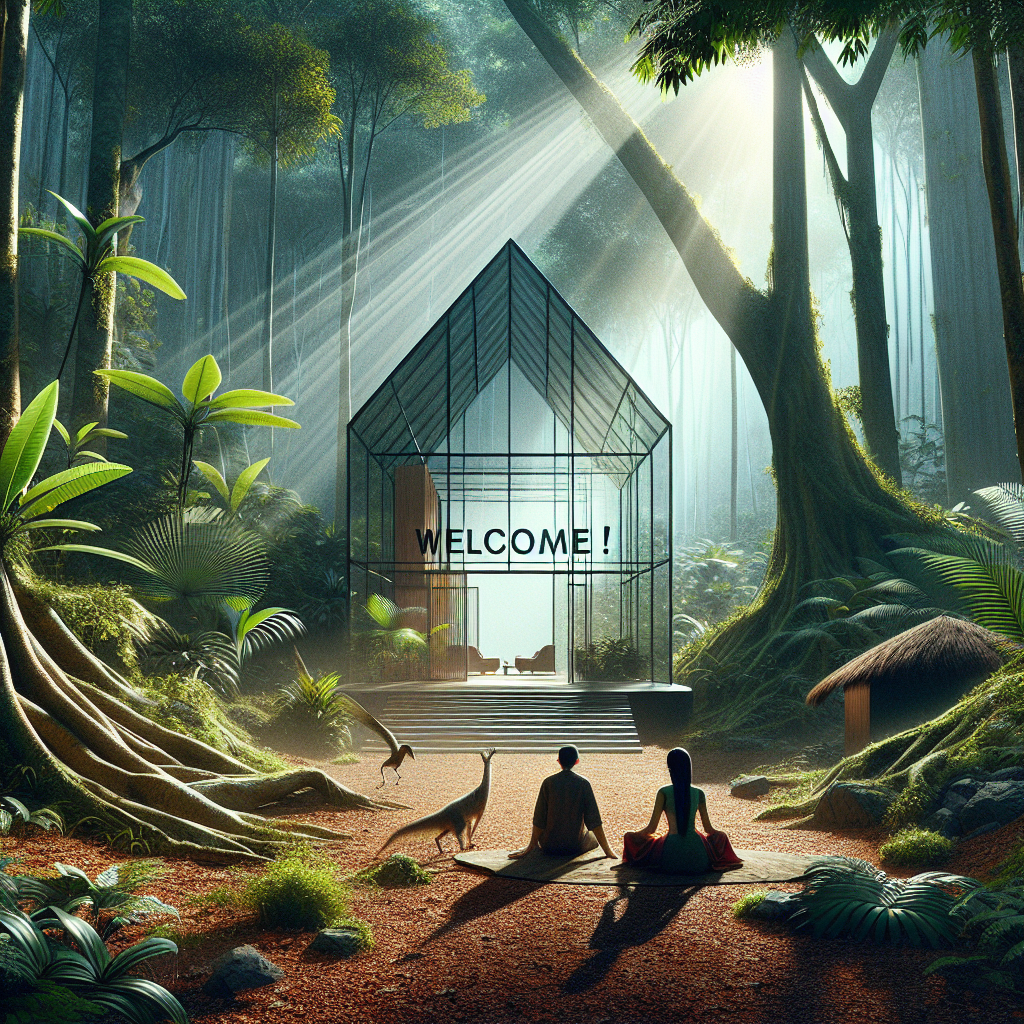

* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


In [44]:
with gr.Blocks() as ui:
    with gr.Row():
        chatbot = gr.Chatbot(height=500, type="messages")
        image_output = gr.Image(value=welcome_image(),height=500)
    with gr.Row():        
        entry = gr.Textbox(label="Chat with our AI Assistant:")
    with gr.Row():        
        model_selector = gr.Dropdown(["GPT", "Claude", "Deepseek"], label="Select model", value="GPT")
    with gr.Row():
        clear = gr.Button("Clear")        

    def do_entry(message, history, model):
        history += [{"role": "user", "content": message}]
        return "", history
    
    entry.submit(fn=do_entry, inputs=[entry, chatbot, model_selector], outputs=[entry, chatbot]).then(
    chat, inputs=chatbot, outputs=chatbot)

    clear.click(lambda: None, inputs=None, outputs=chatbot, queue=False)

# ui.launch(inbrowser=True, server_port=7868,prevent_thread_lock=True)
ui.launch(inbrowser=True)
